# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     940.1
Date:                Mon, 23 Dec 2024   Prob (F-statistic):           2.90e-41
Time:                        12:03:47   Log-Likelihood:                 2.5334
No. Observations:                  50   AIC:                             2.933
Df Residuals:                      46   BIC:                             10.58
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1287      0.082     62.747      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.67759786  5.12169963  5.5303511   5.87895125  6.15177743  6.34456858
  6.46522525  6.53251164  6.57297262  6.61657253  6.6917721   6.82085247
  7.01625439  7.27853432  7.59627295  7.94795139  8.30548665  8.6388456
  8.92097931  9.13226715  9.26374037  9.31855567  9.31147652  9.26644761
  9.21266077  9.17975888  9.19296556  9.26894106  9.41304501  9.61845584
  9.86729154 10.13354766 10.38736972 10.59995823 10.74830041 10.81895104
 10.81024156 10.73255413 10.60661595 10.46009377 10.32304835 10.22299558
 10.18038567 10.20524324 10.29552032 10.43743281 10.60772519 10.77749131
 10.91692359 11.00021035]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.00086861 10.88233532 10.66231276 10.38114221 10.09192696  9.84753081
  9.68763516  9.6290236   9.66147272  9.75025514]


## Plot comparison

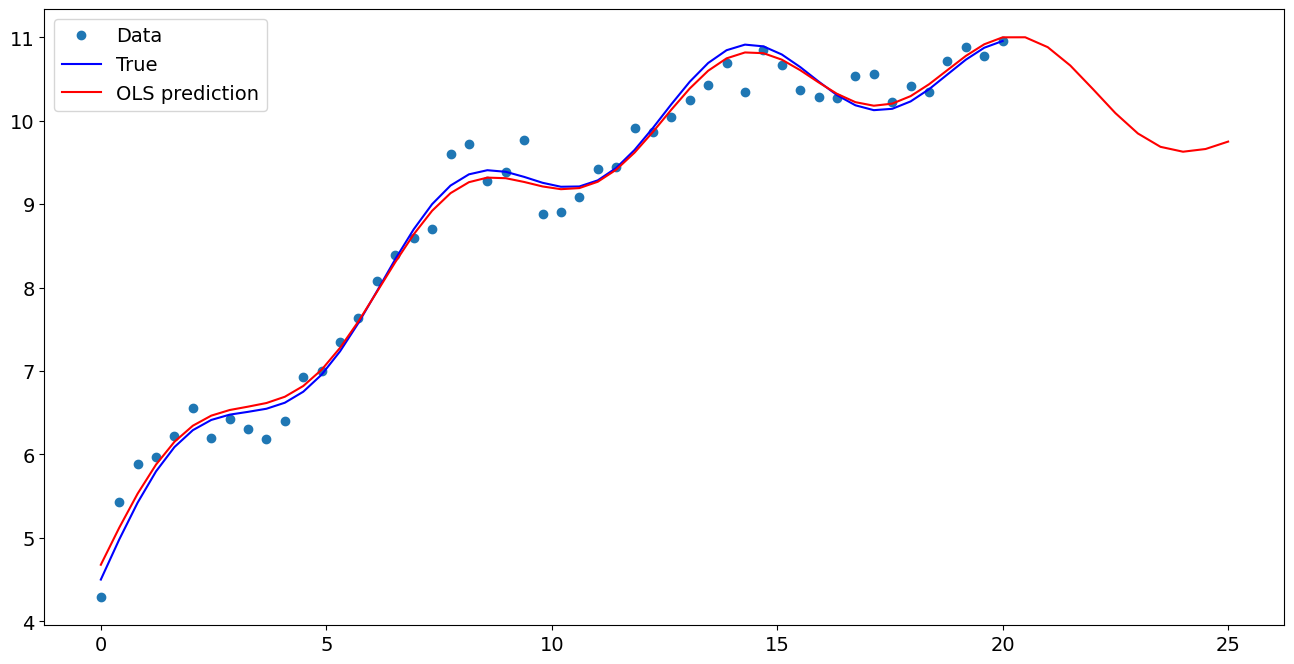

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.128744
x1                  0.475984
np.sin(x1)          0.451402
I((x1 - 5) ** 2)   -0.018046
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.000869
1    10.882335
2    10.662313
3    10.381142
4    10.091927
5     9.847531
6     9.687635
7     9.629024
8     9.661473
9     9.750255
dtype: float64